In [60]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [24]:
df = pd.read_csv('Covid_data.xls')
#df.head()

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State            36 non-null     object 
 1   Total_Cases      36 non-null     int64  
 2   Active           36 non-null     int64  
 3   Deaths           36 non-null     int64  
 4   Active_Ratio     36 non-null     float64
 5   Death_Ratio      36 non-null     float64
 6   Recovered_Cases  36 non-null     int64  
 7   Recovered_Ratio  36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


In [20]:
df.isnull().sum()

State/UTs           0
Total Cases         0
Active              0
Deaths              0
Active Ratio (%)    0
Death Ratio (%)     0
dtype: int64

In [21]:
df.columns

Index(['State/UTs', 'Total Cases', 'Active', 'Deaths', 'Active Ratio (%)',
       'Death Ratio (%)'],
      dtype='object')

In [34]:
df.columns=['State', 'Total_Cases', 'Active', 'Deaths', 'Active_Ratio',
       'Death_Ratio']

In [123]:
df['Recovered_Cases']=df['Total_Cases']-(df['Active']+df['Deaths'])

In [124]:
df['Recovered_Ratio']=df['Recovered_Cases']/df['Total_Cases']*100

In [129]:
df.head()

,State,Total_Cases,Active,Deaths,Active_Ratio,Death_Ratio,Recovered_Cases,Recovered_Ratio
0,Maharashtra,6122893,117869,123857,1.93,2.02,5881167,96.052095
1,Kerala,3011694,108400,14108,3.60,0.47,2889186,95.932256
2,Karnataka,2862338,39626,35601,1.38,1.24,2787111,97.371834
3,Tamil Nadu,2506848,34076,33196,1.36,1.32,2439576,97.316471
4,Andhra Pradesh,1911231,32356,12919,1.69,0.68,1865956,97.631108


In [130]:
df.corr(numeric_only=True)

,Total_Cases,Active,Deaths,Active_Ratio,Death_Ratio,Recovered_Cases,Recovered_Ratio
Total_Cases,1.000000,0.851083,0.920636,-0.208966,0.081011,0.999930,0.220380
Active,0.851083,1.000000,0.716305,-0.000316,-0.072316,0.845924,-0.044007
Deaths,0.920636,0.716305,1.000000,-0.183065,0.276504,0.919349,0.158760
Active_Ratio,-0.208966,-0.000316,-0.183065,1.000000,-0.244900,-0.213190,-0.896459
Death_Ratio,0.081011,-0.072316,0.276504,-0.244900,1.000000,0.080582,0.074872
Recovered_Cases,0.999930,0.845924,0.919349,-0.213190,0.080582,1.000000,0.226473
Recovered_Ratio,0.220380,-0.044007,0.158760,-0.896459,0.074872,0.226473,1.000000


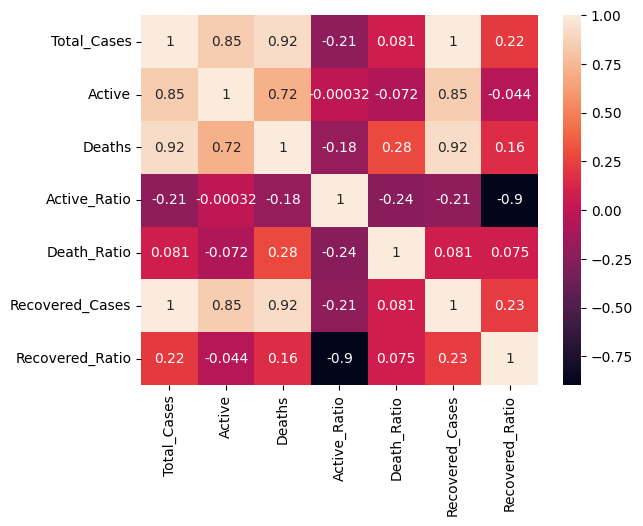

In [135]:
#Well there is not need for headmap but just to check i am making it
sns.heatmap(df.corr(numeric_only=True),annot=True);

In [78]:
d=df.sort_values(by='Active_Ratio',ascending=False)
f = df.sort_values(by='Death_Ratio',ascending=False)
#d

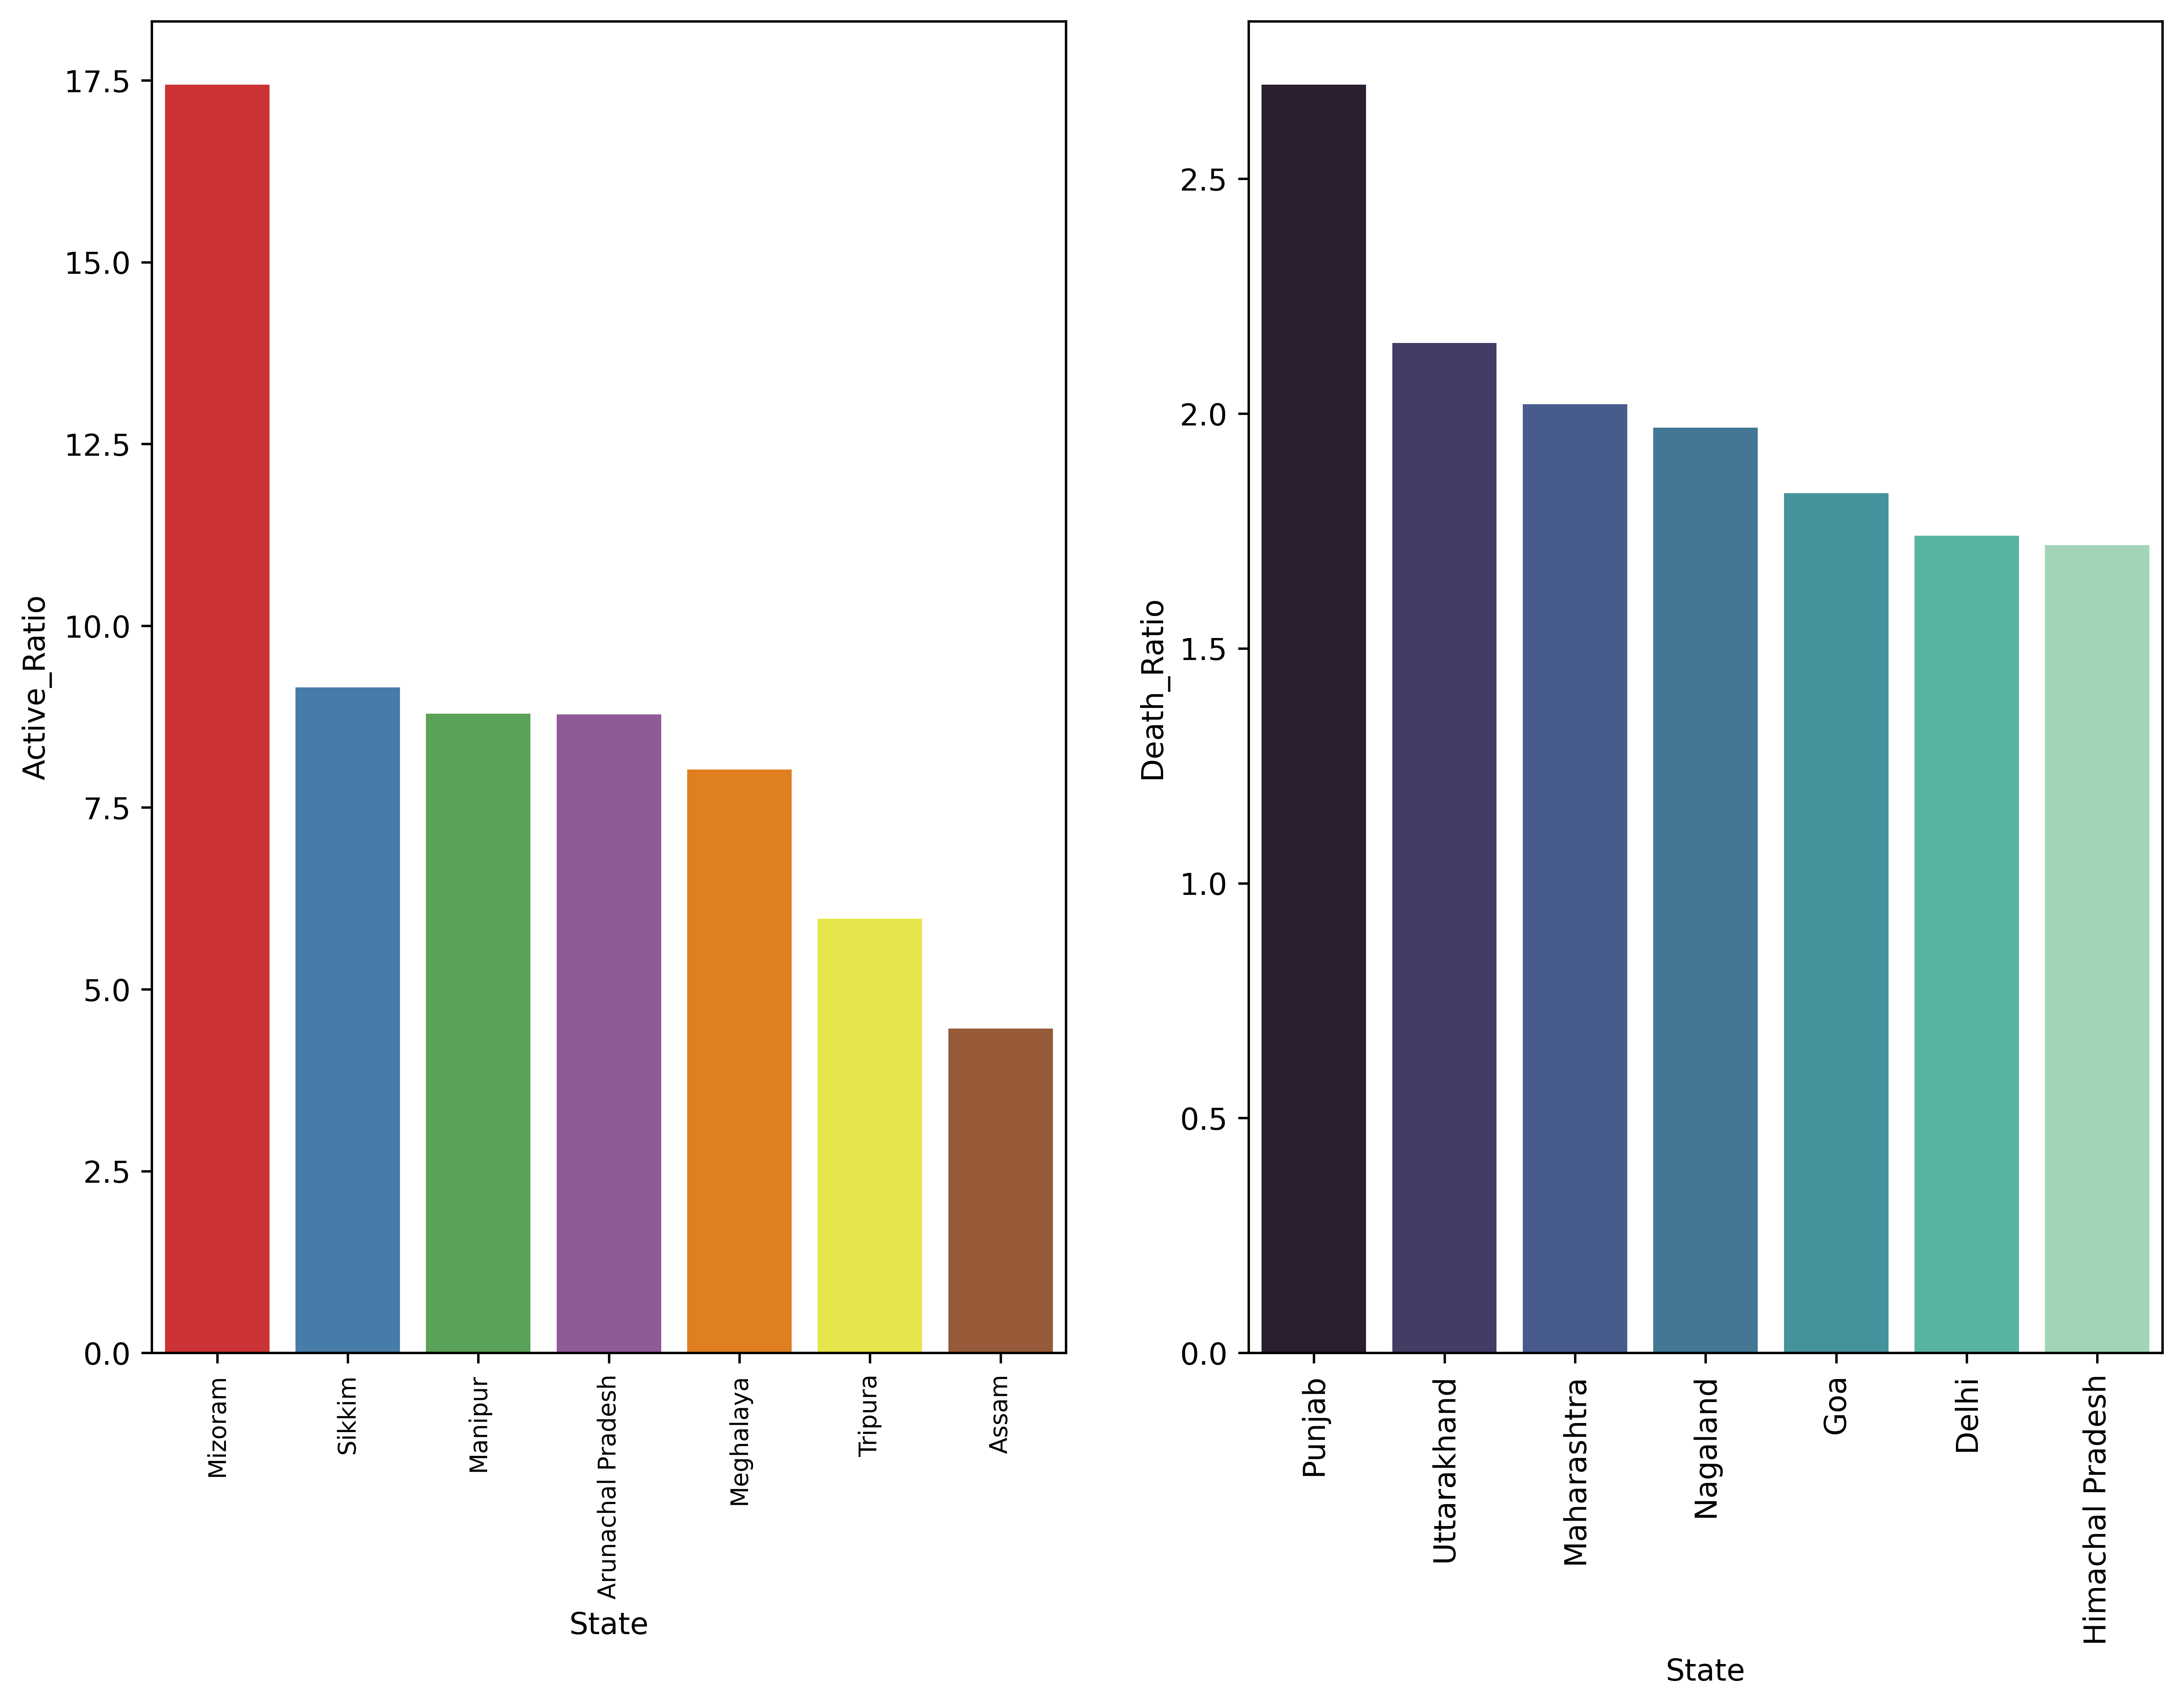

In [85]:
plt.figure(dpi=600,figsize=(12,8))
plt.subplot(1,2,1)
sns.barplot(x='State',y='Active_Ratio',data=d.head(7),palette='Set1');
plt.xticks(rotation=90,fontsize=8);
plt.subplot(1,2,2)
sns.barplot(x='State',y='Death_Ratio',data=f.head(7),palette='mako');
plt.xticks(rotation=90,fontsize=10);

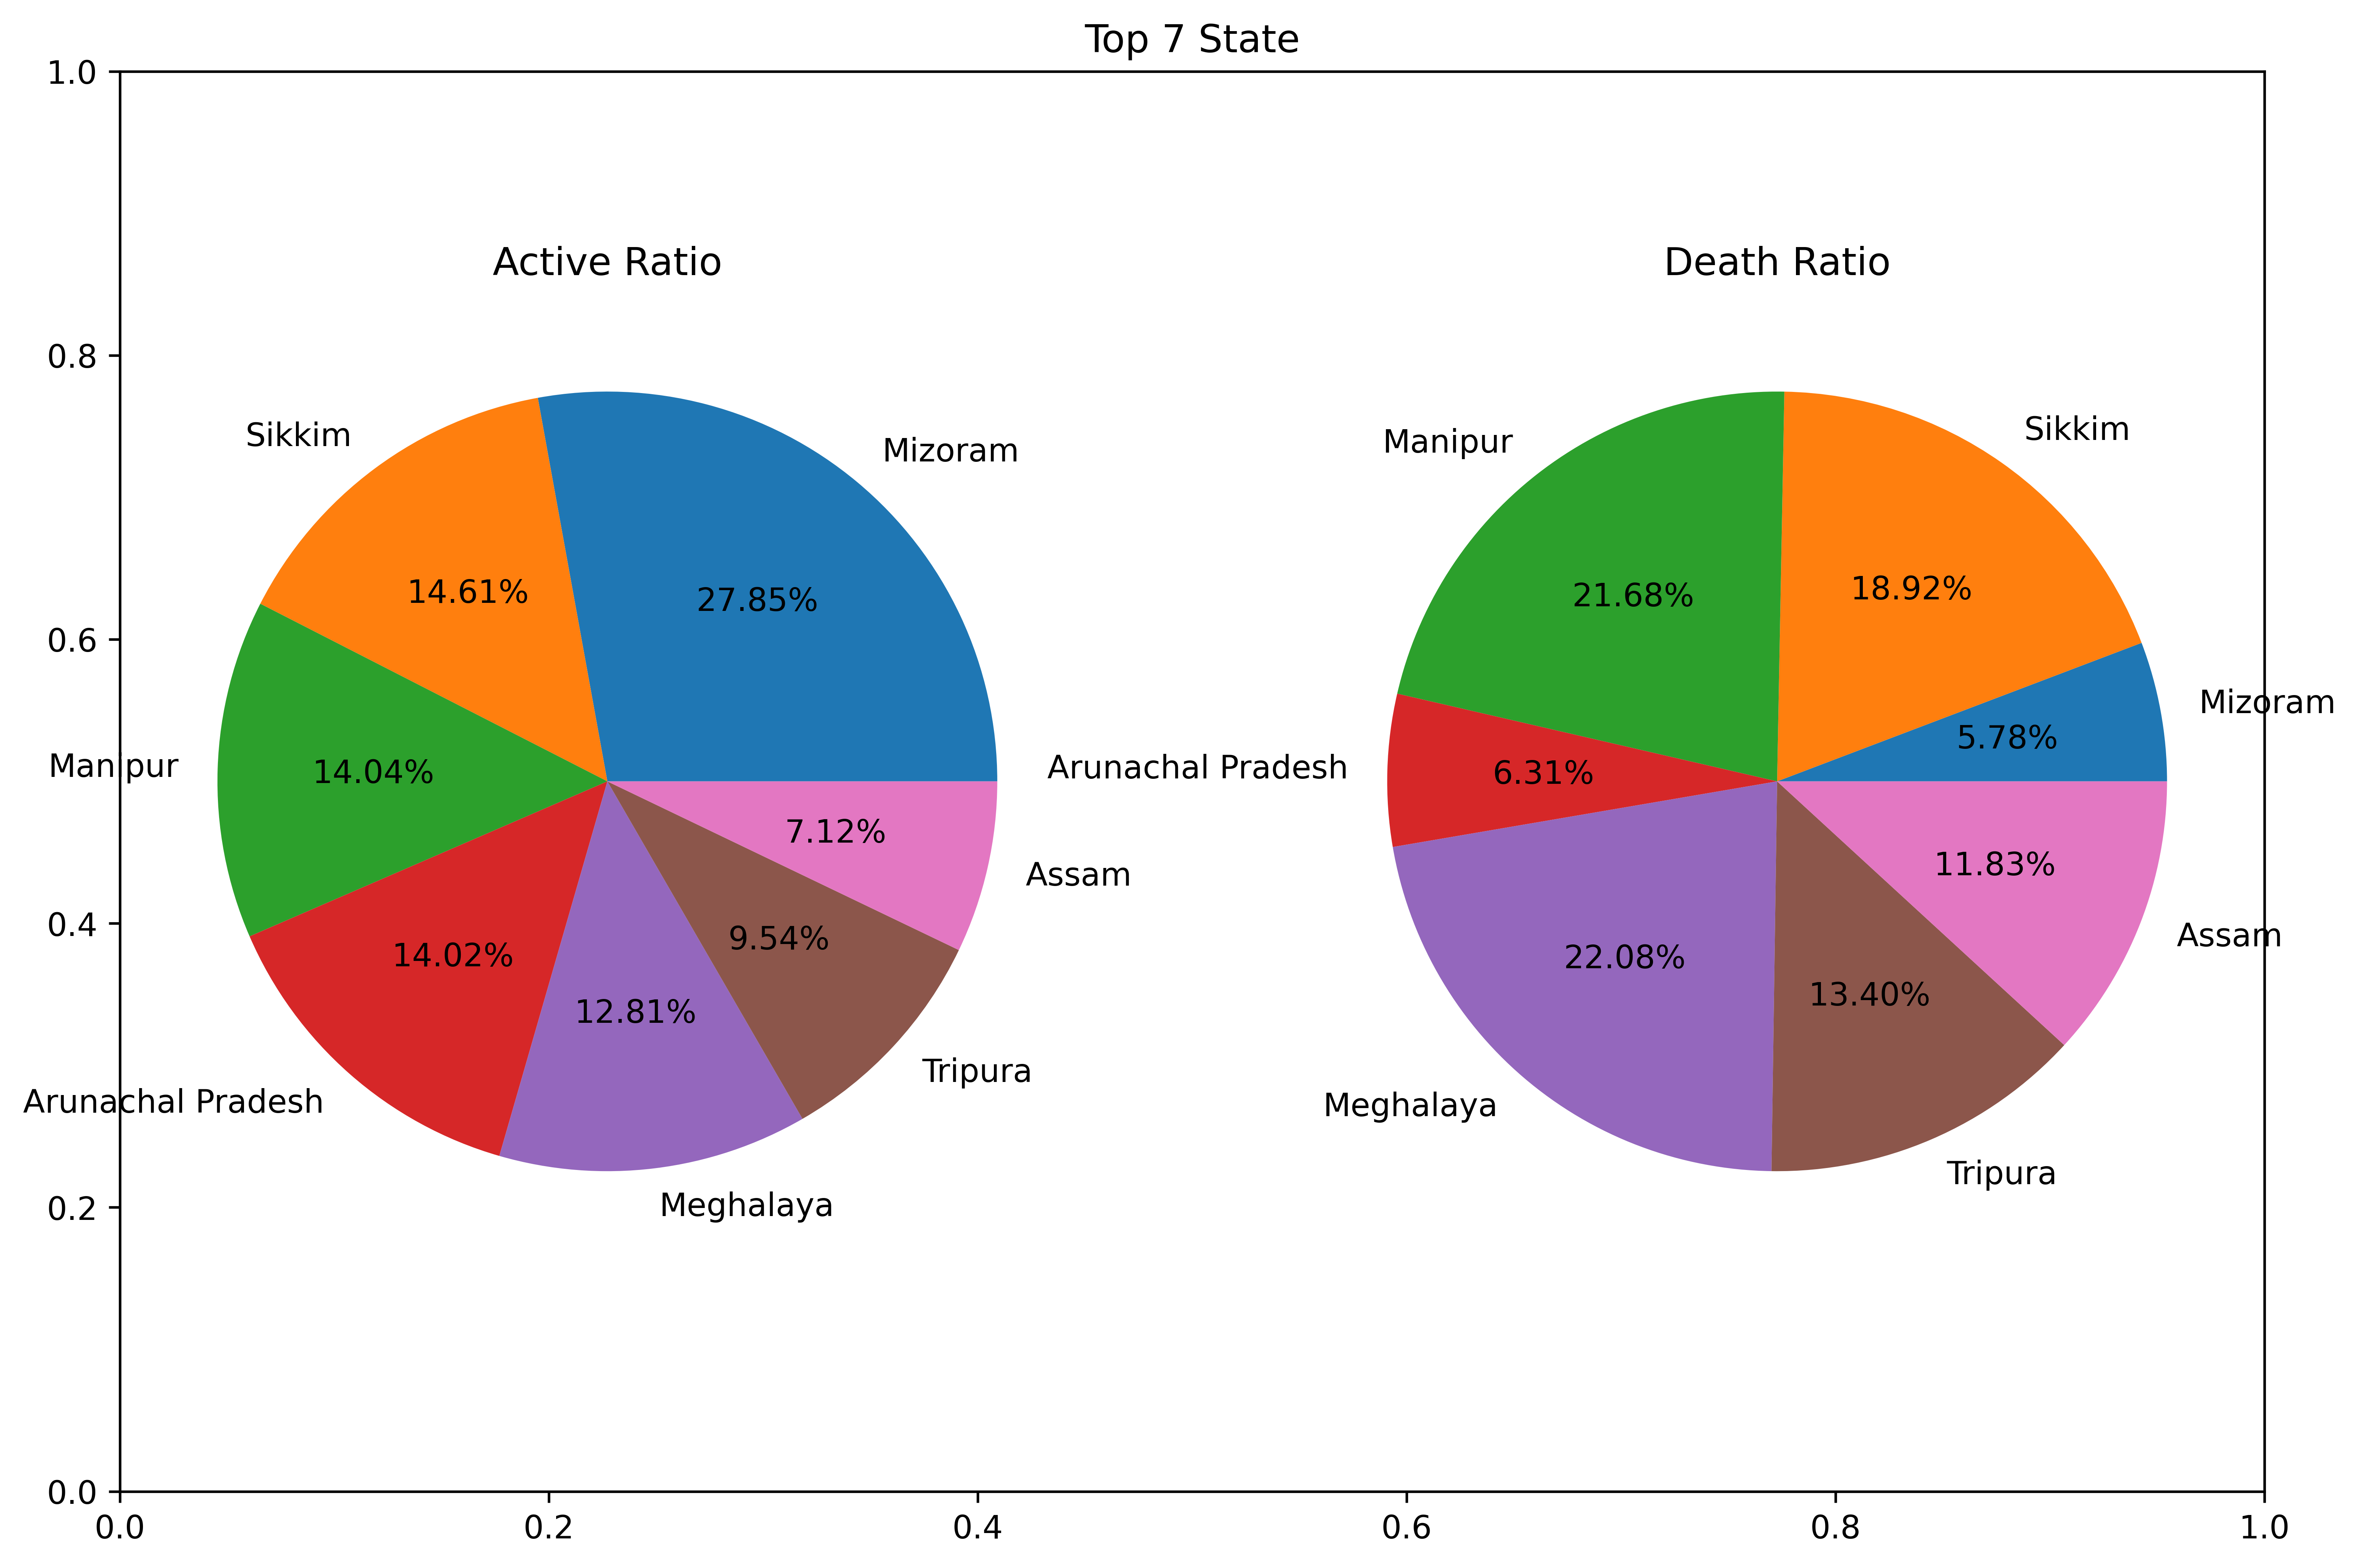

In [140]:
plt.figure(figsize=(12,8),dpi=600)
plt.title('Top 7 State')
plt.subplot(1,2,1)
plt.pie(x='Active_Ratio',labels='State',data=d.head(7),autopct='%0.2f%%');
plt.title('Active Ratio');
plt.subplot(1,2,2)
plt.pie(x='Death_Ratio',labels='State',data=d.head(7),autopct='%0.2f%%');
plt.title('Death Ratio');

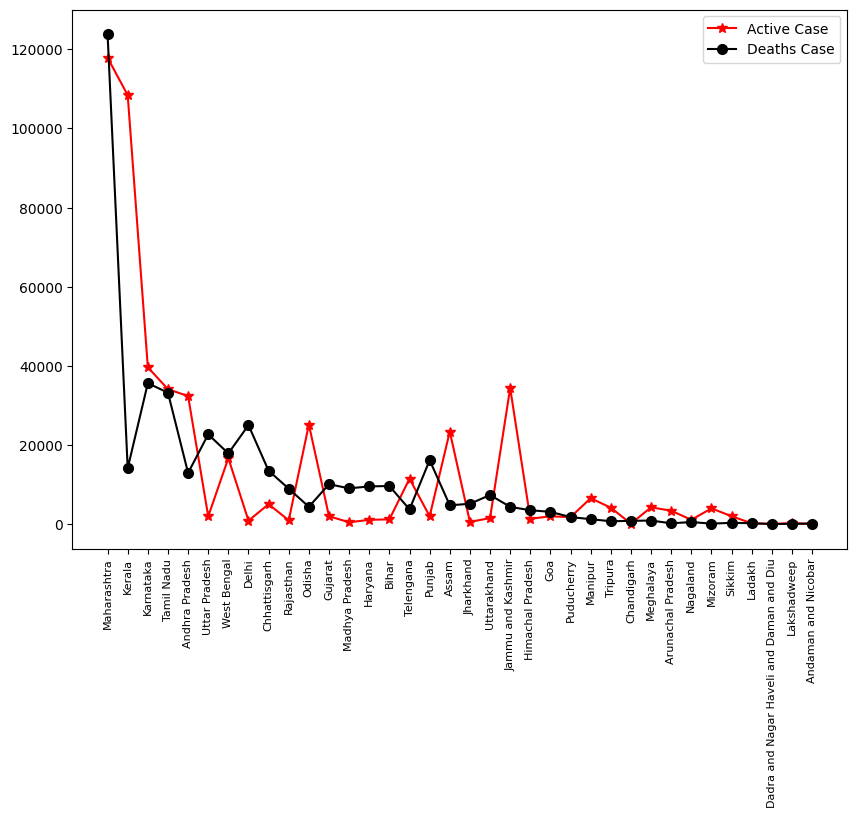

In [146]:
plt.figure(figsize=(10,7))
plt.plot(df['State'],df['Active'],color='red',marker='*',markersize=7,label='Active Case')
plt.plot(df['State'],df['Deaths'],color='black',marker='o',markersize=7,label='Deaths Case')


plt.legend()

plt.xticks(rotation=90,fontsize=8);

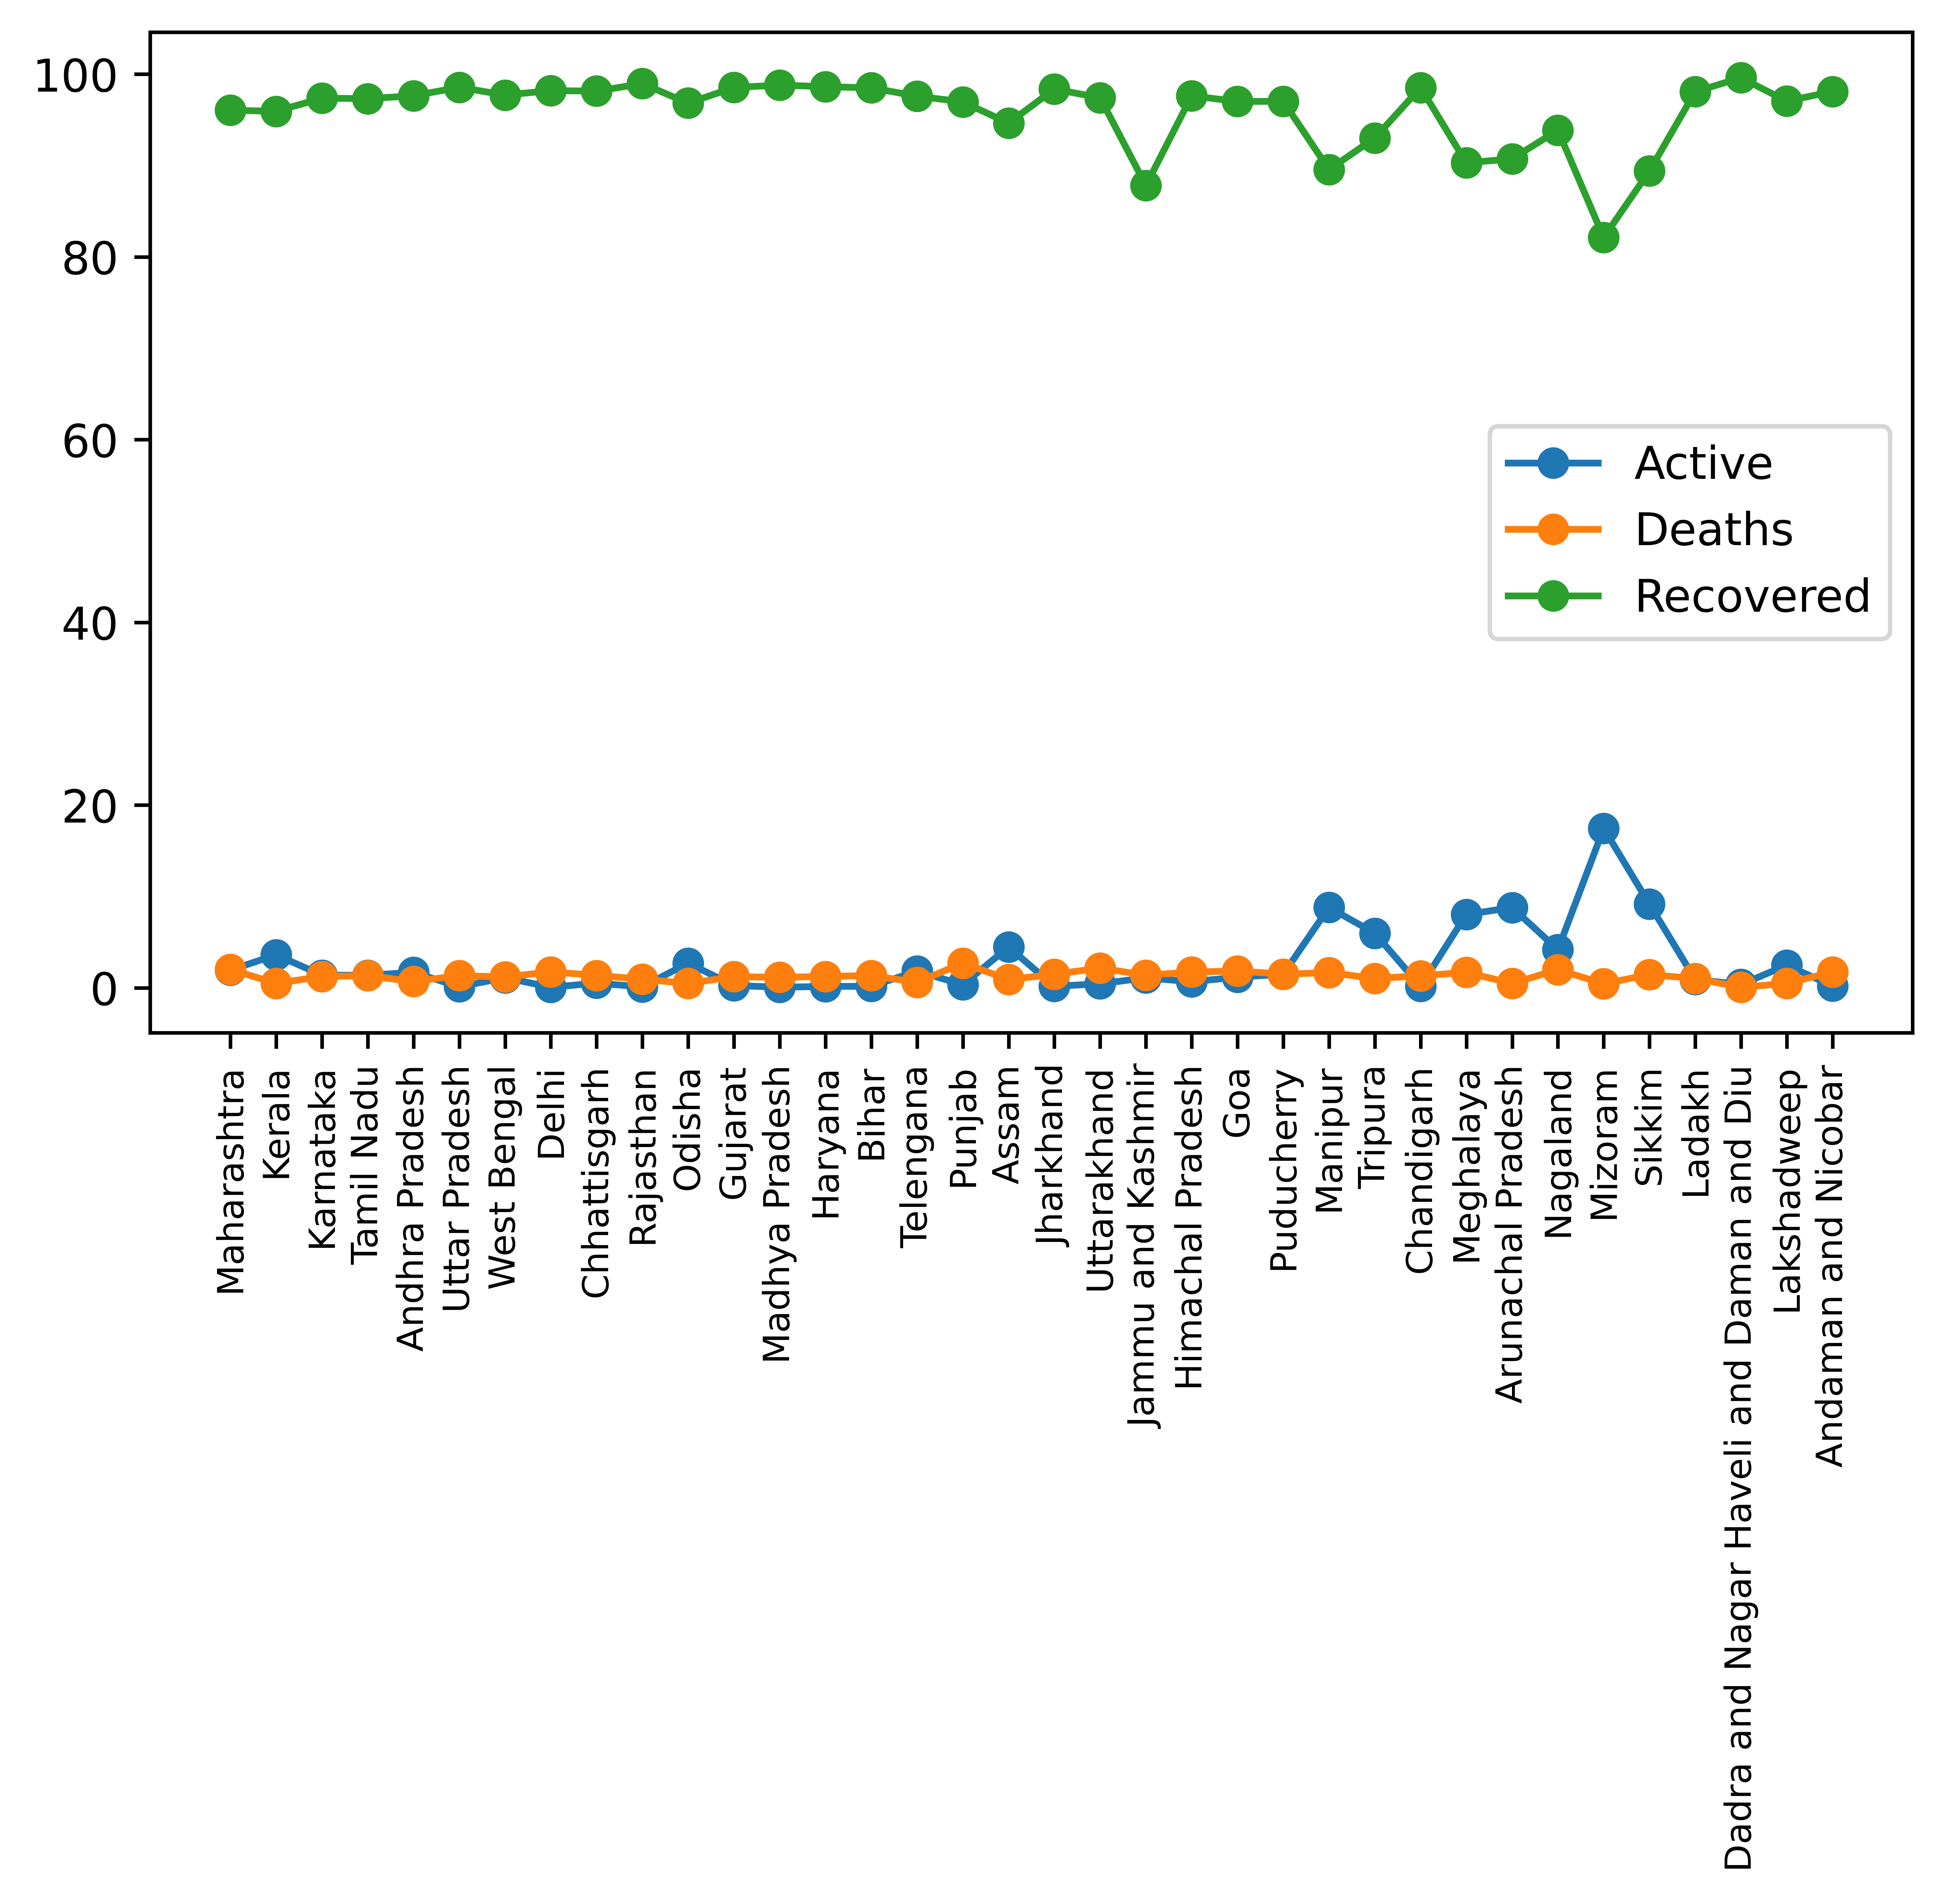

In [128]:
plt.figure(figsize=(7,4),dpi=1000)

plt.plot(df['State'],df['Active_Ratio'],marker='o',label='Active')
plt.plot(df['State'],df['Death_Ratio'],marker='o',label='Deaths')
plt.plot(df['State'],df['Recovered_Ratio'],marker='o',label='Recovered')
plt.legend()
plt.xticks(rotation=90,fontsize=8);
